# Creditworthiness Prediction for Credit Card Issuance

Sei stato assunto dalla Pro National Bank come data scientist, e il tuo primo incarico consiste nel realizzare un modello in grado di stimare l'affidabilità creditizia dei clienti, al fine di aiutare il team dedicato a comprendere se accettare o meno la richiesta per il rilascio della carta di credito.

Ti vengono consegnati i dati anonimizzati di clienti che hanno già ottenuto la carta di credito e ne pagano regolarmente le rate. I dati contengono le informazioni dei correntisti che hanno richiesto l’apertura di una linea di credito.

Colonne del dataset

- ID: numero identificativo del cliente
- CODE_GENDER: sesso del cliente
- FLAGOWNCAR: indicatore del possesso di un'automobile
- FLAGOWNREALTY: indicatore del possesso di una casa
- CNT_CHILDREN: numero di figli
- AMTINCOMETOTAL: reddito annuale
- NAMEINCOMETYPE: tipo di reddito
- NAMEEDUCATIONTYPE: livello di educazione
- NAMEFAMILYSTATUS: stato civile
- NAMEHOUSINGTYPE: tipo di abitazione
- DAYS_BIRTH: numero di giorni trascorsi dalla nascita
- DAYS_EMPLOYED: numero di giorni trascorsi dalla data di assunzione (se positivo, indica il numero di giorni da quando è disoccupato)
- FLAG_MOBIL: indicatore della presenza di un numero di cellulare
- FLAGWORKPHONE: indicatore della presenza di un numero di telefono di lavoro
- FLAG_PHONE: indicatore della presenza di un numero di telefono
- FLAG_EMAIL: indicatore della presenza di un indirizzo email
- OCCUPATION_TYPE: tipo di occupazione
- CNTFAMMEMBERS: numero di familiari
- TARGET: variabile che vale 1 se il cliente ha una elevata affidabilità creditizia (pagamento costante delle rate), 0 altrimenti.


**Obiettivo**

Devi realizzare un modello che preveda il target dato, ovvero la variabile TARGET che indica se il cliente ha una buona affidabilità creditizia.


Punto bonus

Se ad un cliente viene negata la carta di credito, il team deve essere in grado di fornirgli una motivazione. Questo significa che il tuo modello deve fornire delle indicazioni facilmente interpretabili.

## Data analysis & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carichiamo il dataset

In [2]:
URL = "credit_scoring.csv"
df = pd.read_csv(URL)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1


Dimensione del dataset

In [3]:
print("Il dataset è composto da", df.shape[1], "features e", df.shape[0], "osservazioni")

Il dataset è composto da 19 features e 338427 osservazioni


Lista dei check:
- duplicati
- valori mancanti
- natura delle variabili (gestione delle variabili categoriche)
- drop delle informazioni superflue

Check duplicati

In [4]:
duplicates = df.duplicated()
print("Il dataset contiene", duplicates.sum(), "duplicati")

Il dataset contiene 0 duplicati


Check valori mancanti

In [5]:
df.count()

ID                     338427
CODE_GENDER            338427
FLAG_OWN_CAR           338427
FLAG_OWN_REALTY        338427
CNT_CHILDREN           338427
AMT_INCOME_TOTAL       338427
NAME_INCOME_TYPE       338427
NAME_EDUCATION_TYPE    338427
NAME_FAMILY_STATUS     338426
NAME_HOUSING_TYPE      338426
DAYS_BIRTH             338426
DAYS_EMPLOYED          338426
FLAG_MOBIL             338426
FLAG_WORK_PHONE        338426
FLAG_PHONE             338426
FLAG_EMAIL             338426
OCCUPATION_TYPE        235085
CNT_FAM_MEMBERS        338426
TARGET                 338427
dtype: int64

In [6]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          1
NAME_HOUSING_TYPE           1
DAYS_BIRTH                  1
DAYS_EMPLOYED               1
FLAG_MOBIL                  1
FLAG_WORK_PHONE             1
FLAG_PHONE                  1
FLAG_EMAIL                  1
OCCUPATION_TYPE        103342
CNT_FAM_MEMBERS             1
TARGET                      0
dtype: int64

In [7]:
#Controllo la riga con missing value
df[df["NAME_FAMILY_STATUS"].isna()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
338426,6392180,F,N,N,0,67500.0,Working,Secondary / se,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df_test = df.dropna(subset=["NAME_FAMILY_STATUS"])
df_test.isna().sum()
#df_test.count()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        103341
CNT_FAM_MEMBERS             0
TARGET                      0
dtype: int64

Dall'analisi emerge che c'è una riga con diversi valori mancanti che possiamo eliminare e una feature, OCCUPATIONAL TYPE, da gestire successivamente

In [9]:
df.dropna(subset=["NAME_FAMILY_STATUS"], inplace=True)

Check variabili: numeriche vs categoriche

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338426 entries, 0 to 338425
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   338426 non-null  int64  
 1   CODE_GENDER          338426 non-null  object 
 2   FLAG_OWN_CAR         338426 non-null  object 
 3   FLAG_OWN_REALTY      338426 non-null  object 
 4   CNT_CHILDREN         338426 non-null  int64  
 5   AMT_INCOME_TOTAL     338426 non-null  float64
 6   NAME_INCOME_TYPE     338426 non-null  object 
 7   NAME_EDUCATION_TYPE  338426 non-null  object 
 8   NAME_FAMILY_STATUS   338426 non-null  object 
 9   NAME_HOUSING_TYPE    338426 non-null  object 
 10  DAYS_BIRTH           338426 non-null  float64
 11  DAYS_EMPLOYED        338426 non-null  float64
 12  FLAG_MOBIL           338426 non-null  float64
 13  FLAG_WORK_PHONE      338426 non-null  float64
 14  FLAG_PHONE           338426 non-null  float64
 15  FLAG_EMAIL       

In [11]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET
count,3.384260e+05,338426.000000,3.384260e+05,338426.000000,338426.000000,338426.0,338426.000000,338426.000000,338426.000000,338426.000000,338426.000000
mean,5.821199e+06,0.428936,1.876547e+05,-15998.249644,60238.497163,1.0,0.211379,0.293302,0.105181,2.197228,0.087824
std,4.517700e+05,0.727991,1.106747e+05,4180.240053,138499.153147,0.0,0.408287,0.455276,0.306787,0.899570,0.283040
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.439601e+06,0.000000,1.215000e+05,-19482.000000,-3116.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.878906e+06,0.000000,1.620000e+05,-15622.000000,-1485.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,6.140205e+06,1.000000,2.250000e+05,-12524.000000,-380.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,6.841875e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [12]:
df["FLAG_MOBIL"].value_counts()

1.0    338426
Name: FLAG_MOBIL, dtype: int64

Le feature ID e FLAG_MOBILE posso essere droppate. Non hanno contenuto informativo

In [13]:
df.drop(columns=["ID","FLAG_MOBIL"], inplace=True)
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,0.0,0.0,NaN,2.0,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,0.0,0.0,NaN,2.0,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,0.0,0.0,0.0,Security staff,2.0,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,0.0,1.0,1.0,Sales staff,1.0,1
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,0.0,1.0,1.0,Sales staff,1.0,1


Trasformazione dei dati qualitativi in dati quantitativi

In [14]:
numerical_types = ['int64', 'float64']
numerical_features = [col for col in df.columns if df[col].dtypes in numerical_types]
print("Il dataset contiene", len(numerical_features), "features numeriche")
cat_features = [col for col in df.columns if df[col].dtypes == 'object']
print("Il dataset contiene", len(cat_features), "features categoriche")

Il dataset contiene 9 features numeriche
Il dataset contiene 8 features categoriche


Capiamo quali strategie utilizzare per gestire i dati mancanti

In [15]:
for cat in cat_features:
    print("La feature", cat, "ha", df[cat].nunique(), "categorie")
    print("     che sono:", df[cat].unique())
    print("------------------------------------------------------------------")

La feature CODE_GENDER ha 2 categorie
     che sono: ['M' 'F']
------------------------------------------------------------------
La feature FLAG_OWN_CAR ha 2 categorie
     che sono: ['Y' 'N']
------------------------------------------------------------------
La feature FLAG_OWN_REALTY ha 2 categorie
     che sono: ['Y' 'N']
------------------------------------------------------------------
La feature NAME_INCOME_TYPE ha 5 categorie
     che sono: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
------------------------------------------------------------------
La feature NAME_EDUCATION_TYPE ha 5 categorie
     che sono: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
------------------------------------------------------------------
La feature NAME_FAMILY_STATUS ha 5 categorie
     che sono: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
-------------------------------------

Concludo la gestione dei dati mancanti associando una nuova label alle OCCUPATION mancanti

In [42]:
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna("unknown_occupation") 
na_count = df["OCCUPATION_TYPE"].isna().sum()
print(f"La feature 'OCCUPATION_TYPE' ha {na_count} valori mancanti")
print("La feature 'OCCUPATION_TYPE' ha", df["OCCUPATION_TYPE"].nunique(), "categorie")

La feature 'OCCUPATION_TYPE' ha 0 valori mancanti
La feature 'OCCUPATION_TYPE' ha 19 categorie


Abbiamo quindi:
- controllato la presenza di duplicati
- controllato e gestito i dati mancanti

Manca:
- Encoding delle variabili categoriche

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

df_test = df.copy()
cat_features = [col for col in df.columns if df[col].dtypes == 'object']

encoder = ColumnTransformer([('LE', OrdinalEncoder(), cat_features[:3]),
                             ('OHE', OneHotEncoder(), cat_features[3:])], remainder="passthrough") #handle_unknown='ignore'

df_test = encoder.fit_transform(df_test)
print("La trasformazione ha generato un dataset con", df_test.shape[1], "features rispetto alle", df.shape[1], "originali")
print(df_test.shape, "vs", df.shape)

La trasformazione ha generato un dataset con 52 features rispetto alle 17 originali
(338426, 52) vs (338426, 17)


Ricostruiamo il dataset per vedere che tutto sia corretto

In [44]:
# Get feature names for OneHotEncoder
columns = df.columns.tolist()
ohe_feature_names = encoder.named_transformers_['OHE'].get_feature_names_out(cat_features[3:])
remaining_columns = [col for col in columns if col not in cat_features]

# Combine feature names
all_feature_names = [
    *cat_features[:3], 
    *ohe_feature_names, 
    *remaining_columns
]

len(all_feature_names)


52

In [45]:
df_test = pd.DataFrame(df_test, columns=all_feature_names)
df_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,...,OCCUPATION_TYPE_unknown_occupatio,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,427500.0,-12005.0,-4542.0,1.0,0.0,0.0,2.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,427500.0,-12005.0,-4542.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,112500.0,-21474.0,-1134.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,270000.0,-19110.0,-3051.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,270000.0,-19110.0,-3051.0,0.0,1.0,1.0,1.0,1.0


In [46]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,0.0,0.0,unknown_occupatio,2.0,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,0.0,0.0,unknown_occupatio,2.0,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,0.0,0.0,0.0,Security staff,2.0,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,0.0,1.0,1.0,Sales staff,1.0,1
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,0.0,1.0,1.0,Sales staff,1.0,1


Ultimo check sul dato

In [47]:
#df[remaining_columns].equals(df_test[remaining_columns])

(df[remaining_columns]==df_test[remaining_columns]).all().unique



<bound method Series.unique of CNT_CHILDREN        True
AMT_INCOME_TOTAL    True
DAYS_BIRTH          True
DAYS_EMPLOYED       True
FLAG_WORK_PHONE     True
FLAG_PHONE          True
FLAG_EMAIL          True
CNT_FAM_MEMBERS     True
TARGET              True
dtype: bool>

TUTTI I CHECK SON STATI PASSATI

In [48]:
df_proc = df_test.copy()

Analizziamo la variabile TARGET (sbilanciata, richiede accortezze nella costruzione del modello)

In [49]:
target_ones = np.count_nonzero(df_proc["TARGET"])
target_zeros = df_proc.shape[0] - target_ones
mean = (target_ones/df_proc.shape[0])*100

print(f"Response ha {target_zeros} valori pari a 0")
print(f"Response ha {target_ones} valori pari a 1")
print(f"La % di utenti che accetta il cross-selling è {mean:.2f} %")

Response ha 308704 valori pari a 0
Response ha 29722 valori pari a 1
La % di utenti che accetta il cross-selling è 8.78 %


Check sulle correlazioni

In [50]:
# plt.figure(figsize=(14, 10), dpi=100)

# hm = sns.heatmap(df_proc.corr(),
#                  cbar=True,
#                  square=True,
#                  yticklabels=df_proc.columns,
#                  xticklabels=df_proc.columns,
#                  annot=True,                  #Questo ci mostra i valori degli indici
#                  annot_kws={'size':12})       #Impostiamo la dimensione dell'annotazione a 12 per farla entrare dentro il quadrato

# plt.show()

In [51]:
corr_matrix = df_proc.corr()
correlation = np.array(corr_matrix)
corr_array = correlation.reshape((corr_matrix.shape[0]*corr_matrix.shape[1],1))
corr_array_sorted = np.sort(corr_array,axis=0)
corr_array_sorted = np.unique(corr_array,axis=0)
# corr_array_sorted[-17,0]
print("Le prime 10 correlazioni a valore neg:")
print(corr_array_sorted[:10])
print("Le prime 10 correlazioni a valore pos:")
print(corr_array_sorted[10:])

Le prime 10 correlazioni a valore neg:
[[-0.8993184 ]
 [-0.6357651 ]
 [-0.62106173]
 [-0.61675781]
 [-0.56462172]
 [-0.55766259]
 [-0.54363175]
 [-0.46807199]
 [-0.46790192]
 [-0.44631608]]
Le prime 10 correlazioni a valore pos:
[[-0.42684888]
 [-0.42673847]
 [-0.37660819]
 ...
 [ 0.88655892]
 [ 0.99987439]
 [ 1.        ]]


In [52]:
def find_high_corr(corr_matrix, threshold):
    high_corr = []

    for i in range(corr_matrix.shape[0]):
        for j in range(i+1, corr_matrix.shape[1]):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                high_corr.append([corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i,j]])
        
    return high_corr

In [53]:
high_corr = find_high_corr(corr_matrix, 0.7)

for i in high_corr:
    print(i)

['NAME_INCOME_TYPE_Pensioner', 'DAYS_EMPLOYED', 0.9998743927799938]
['NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special', -0.8993184049507512]
['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 0.8865589172075321]


Qualche considerazione:
- il numero di giorni trascorsi dall'assunzione e la pensione come fonte di reddito sono estremamente correlate
- all'interno di livello di educazione c'è un trade off tra high education e secondary education
- il numero di figli è legato al numero di familiari

Tutto torna

In [54]:
corr_matrix["TARGET"].sort_values(ascending=False)[:5]

TARGET                                   1.000000
AMT_INCOME_TOTAL                         0.224394
OCCUPATION_TYPE_Managers                 0.095132
NAME_INCOME_TYPE_Commercial associate    0.063281
NAME_INCOME_TYPE_State servant           0.048683
Name: TARGET, dtype: float64

La variabile target sembra avere una bassa correlazione con le altre feature prese singolarmente. Proviamo a visualizzare un po' i dati con l'obiettivo di estrarre qualche informazione sulle distribuzioni che stiamo trattando

In [55]:
print(numerical_features)
print(cat_features)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'TARGET']
['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [56]:
discrete_features = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED','CNT_CHILDREN', 'CNT_FAM_MEMBERS']
categorical_features = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
flag_features = ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CODE_GENDER']
print("check su n° variabili da plottare:", len(discrete_features)+ len(categorical_features)+len(flag_features))
print("vs feature del df originale:", len(df.columns)-1, "(escluso il target)") #escludiamo il target

check su n° variabili da plottare: 16
vs feature del df originale: 16 (escluso il target)


Occhio che in questa fase lavoreremo anche con il df senza encoding

Visualizzazione delle distribuzioni delle variabili "discrete"

<AxesSubplot:xlabel='TARGET', ylabel='CNT_FAM_MEMBERS'>

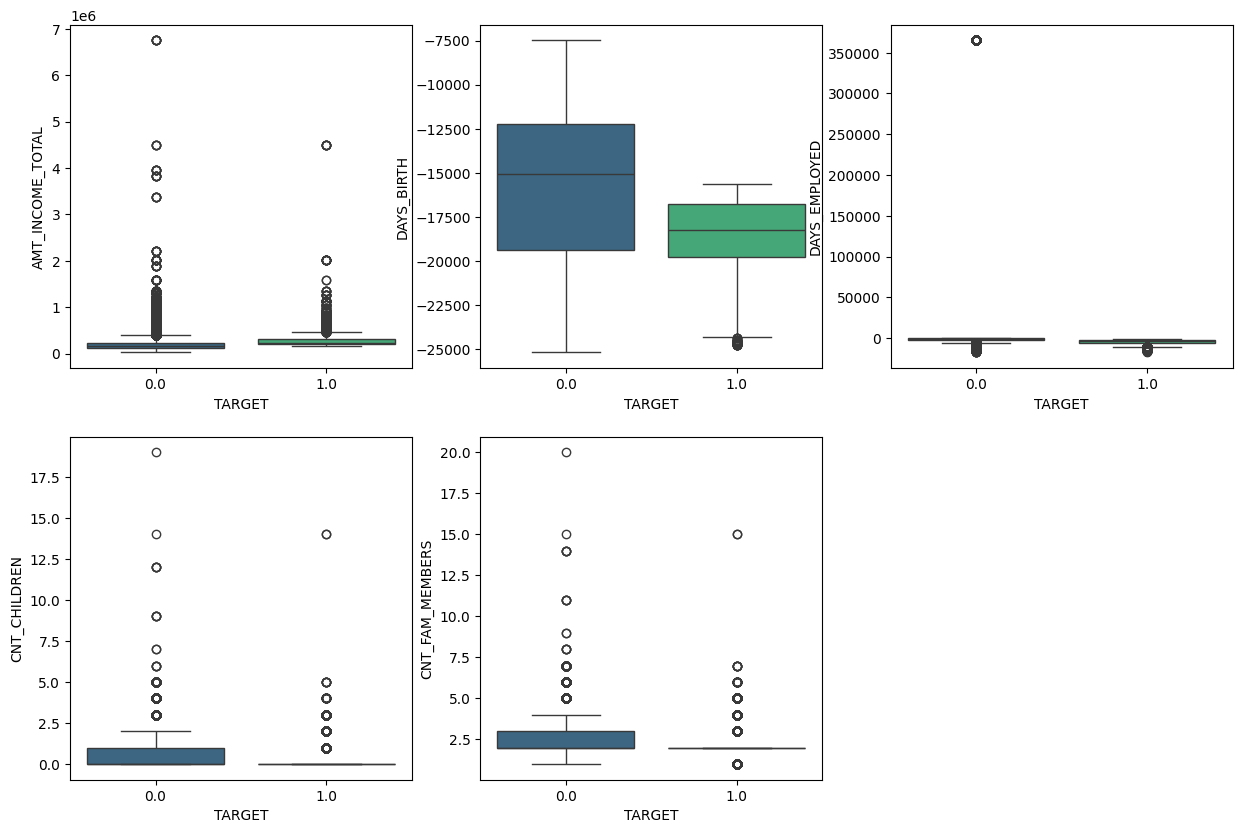

In [57]:
plt.figure(figsize=(15, 10), dpi=100)

plt.subplot(2, 3, 1)
sns.boxplot(x="TARGET", y=discrete_features[0], data=df_proc, palette="viridis", hue="TARGET", legend=False)
plt.subplot(2, 3, 2)
sns.boxplot(x="TARGET", y=discrete_features[1], data=df_proc, palette="viridis", hue="TARGET", legend=False)
plt.subplot(2, 3, 3)
sns.boxplot(x="TARGET", y=discrete_features[2], data=df_proc, palette="viridis", hue="TARGET", legend=False)
plt.subplot(2, 3, 4)
sns.boxplot(x="TARGET", y=discrete_features[3], data=df_proc, palette="viridis", hue="TARGET", legend=False)
plt.subplot(2, 3, 5)
sns.boxplot(x="TARGET", y=discrete_features[4], data=df_proc, palette="viridis", hue="TARGET", legend=False)


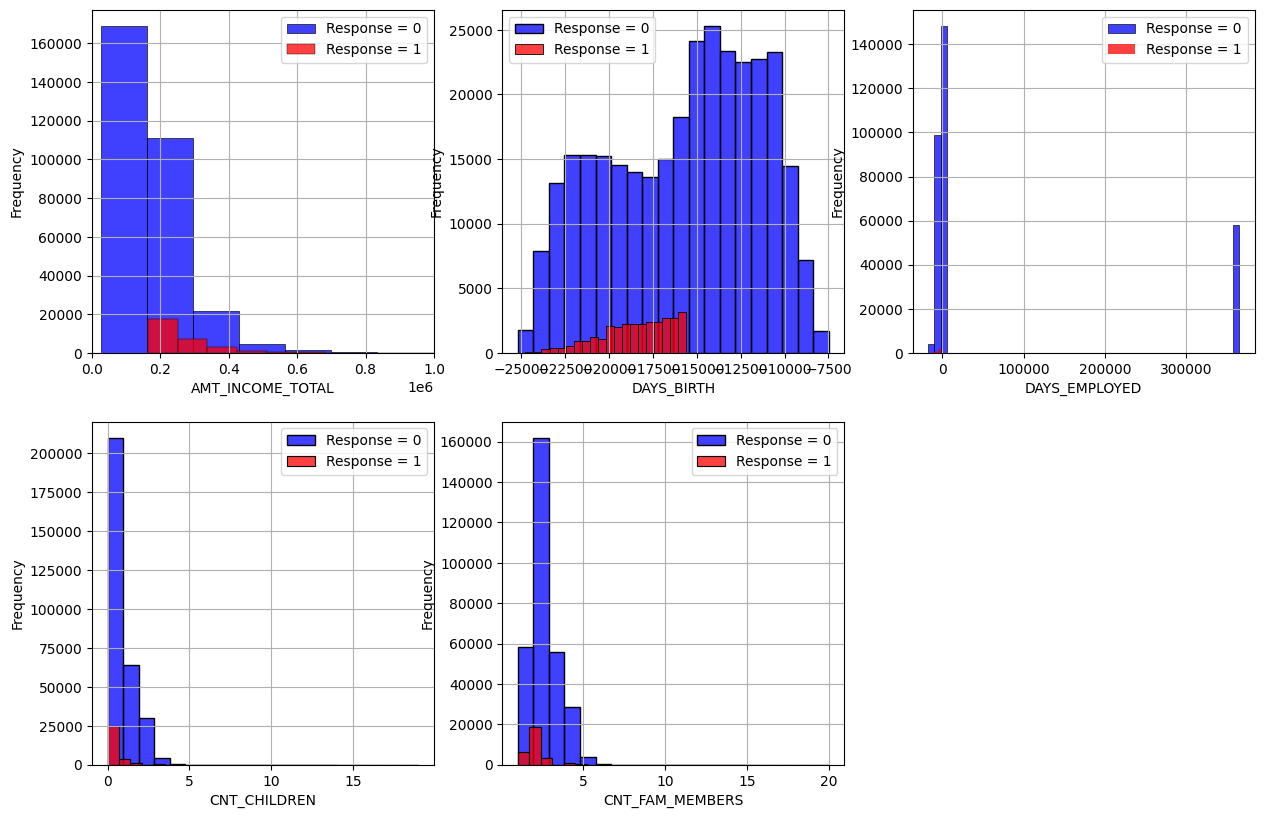

In [58]:
plt.figure(figsize=(15, 10), dpi=100)

plt.subplot(2, 3, 1)
sns.histplot(df[df['TARGET'] == 0][discrete_features[0]], color='blue', label='Response = 0', kde=False, bins=50)
sns.histplot(df[df['TARGET'] == 1][discrete_features[0]], color='red', label='Response = 1', kde=False, bins=50)
plt.xlabel(discrete_features[0])
plt.xlim(0, 1000000)
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 2)
sns.histplot(df[df['TARGET'] == 0][discrete_features[1]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][discrete_features[1]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(discrete_features[1])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 3)
sns.histplot(df[df['TARGET'] == 0][discrete_features[2]], color='blue', label='Response = 0', kde=False, bins=50)
sns.histplot(df[df['TARGET'] == 1][discrete_features[2]], color='red', label='Response = 1', kde=False, bins=50)
plt.xlabel(discrete_features[2])
#plt.xlim(0, 10000)
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 4)
sns.histplot(df[df['TARGET'] == 0][discrete_features[3]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][discrete_features[3]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(discrete_features[3])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 5)
sns.histplot(df[df['TARGET'] == 0][discrete_features[4]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][discrete_features[4]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(discrete_features[4])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)


Sembra esserci un outlier per quanto riguarda DAYS_EMPLOYED. Dalle indagini pare che tutti i "disoccupati" siano stati contrassegnati con il valore di 365243 gg

In [59]:
print((df[discrete_features[2]]>300000).sum())
df[df[discrete_features[2]]>0].describe()

57841


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET
count,57841.000000,5.784100e+04,57841.000000,57841.0,57841.0,57841.000000,57841.000000,57841.000000,57841.0
mean,0.039159,1.529742e+05,-21716.322436,365243.0,0.0,0.300064,0.053509,1.730191,0.0
std,0.250045,7.801609e+04,1852.232388,0.0,0.0,0.458289,0.225048,0.532670,0.0
min,0.000000,2.610000e+04,-25201.000000,365243.0,0.0,0.000000,0.000000,1.000000,0.0
25%,0.000000,9.900000e+04,-22989.000000,365243.0,0.0,0.000000,0.000000,1.000000,0.0
50%,0.000000,1.350000e+05,-21916.000000,365243.0,0.0,0.000000,0.000000,2.000000,0.0
75%,0.000000,1.800000e+05,-20795.000000,365243.0,0.0,1.000000,0.000000,2.000000,0.0
max,4.000000,1.260000e+06,-8145.000000,365243.0,0.0,1.000000,1.000000,6.000000,0.0


In [60]:
print("Il numero di anni corrispondenti è",df[discrete_features[2]].max()/365)

Il numero di anni corrispondenti è 1000.6657534246575


NB. è chiaramente un errore da gestire. Dal momento che il valore "se positivo, indica il numero di giorni da quando è disoccupato" lo andremo a sostituire con il valore assoluto del valore medio del gruppo degli impiegati. E' una grossa assunzione che protrebbe impattare sul risultato. Da testarne l'effetto.

In [61]:
unemployed_mean_value = abs(df[df[discrete_features[2]]<0][discrete_features[2]].mean())
print("Il valore medio di giorni di disoccupazione è", unemployed_mean_value, "ossia", unemployed_mean_value/365, "anni")  

Il valore medio di giorni di disoccupazione è 2636.444293173192 ossia 7.223135049789567 anni


In [62]:
df_proc_modified = df_proc.copy()
df_proc_modified[discrete_features[2]] = df_proc_modified[discrete_features[2]].apply(lambda x: unemployed_mean_value if x > 0 else x)

Passiamo alle variabili categoriche

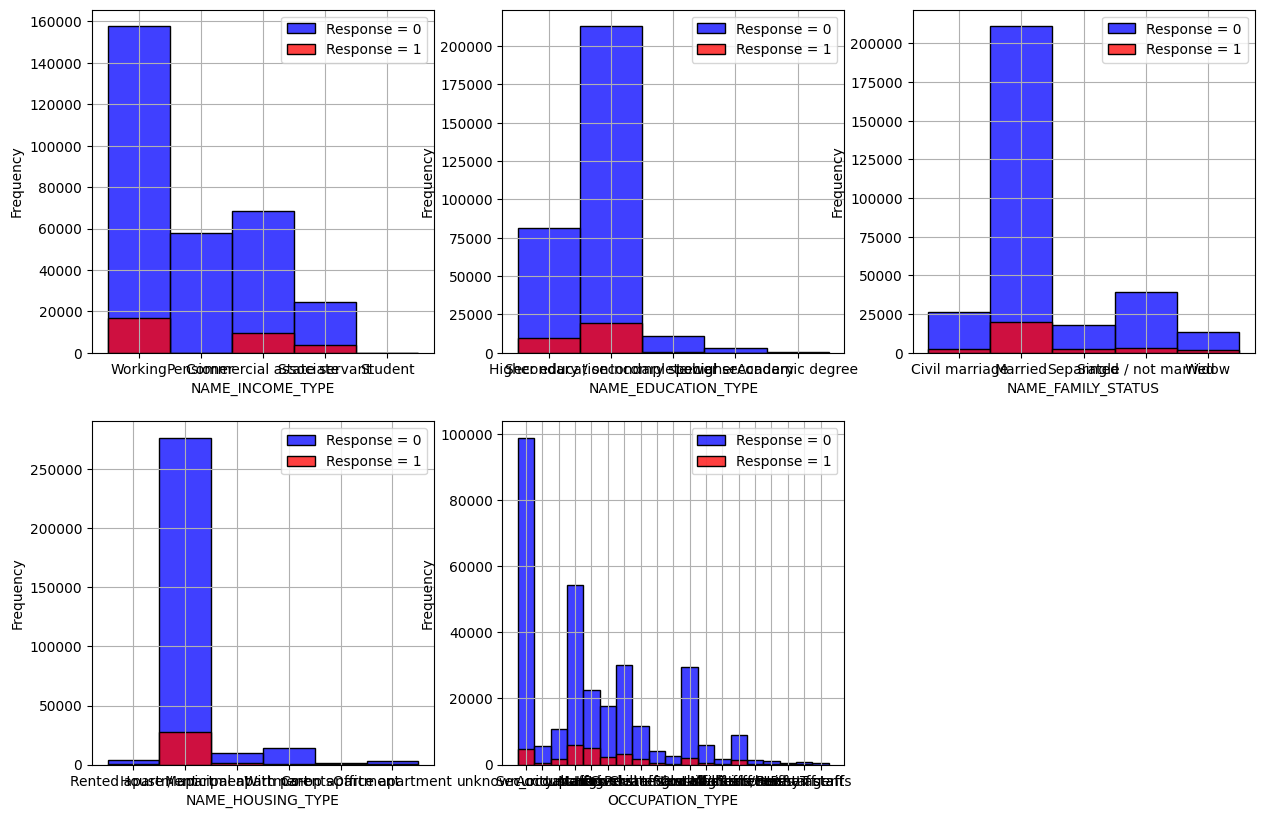

In [63]:
plt.figure(figsize=(15, 10), dpi=100)

plt.subplot(2, 3, 1)
sns.histplot(df[df['TARGET'] == 0][categorical_features[0]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][categorical_features[0]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(categorical_features[0])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 2)
sns.histplot(df[df['TARGET'] == 0][categorical_features[1]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][categorical_features[1]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(categorical_features[1])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 3)
sns.histplot(df[df['TARGET'] == 0][categorical_features[2]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][categorical_features[2]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(categorical_features[2])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 4)
sns.histplot(df[df['TARGET'] == 0][categorical_features[3]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][categorical_features[3]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(categorical_features[3])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 5)
sns.histplot(df[df['TARGET'] == 0][categorical_features[4]], color='blue', label='Response = 0', kde=False, bins=20)
sns.histplot(df[df['TARGET'] == 1][categorical_features[4]], color='red', label='Response = 1', kde=False, bins=20)
plt.xlabel(categorical_features[4])
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)


Per queste feature, sembra che non ci siano azioni da implementare

Per le variabili "flag" non è necessario visualizzare la distribuzione. Bastano i conteggi che abbiamo visto in precedenza. Potremmo plottare la combinazione di feature a maggiore correlazione per completare la parte di visualizzazione.

- ['NAME_INCOME_TYPE_Pensioner', 'DAYS_EMPLOYED']
- ['NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special']
- ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

In [64]:
def plot_pairwise_scatter_with_hue(df, vars_to_plot=None, hue='TARGET'):
    plt.figure(figsize=(10, 10), dpi=100)

    if vars_to_plot is not None:
        df = df[vars_to_plot + [hue]]
    
    sns.pairplot(df, hue=hue)
    plt.suptitle('Pairwise Scatter Plots with Hue', y=1.02)
    plt.show()

<Figure size 1000x1000 with 0 Axes>

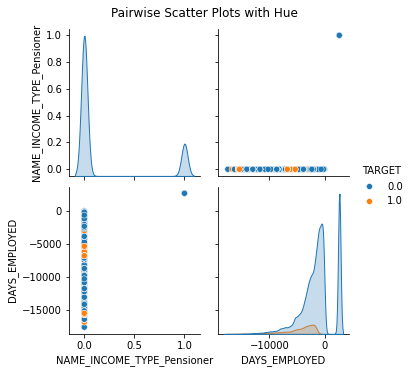

In [65]:
plot_pairwise_scatter_with_hue(df_proc_modified, vars_to_plot=['NAME_INCOME_TYPE_Pensioner', 'DAYS_EMPLOYED'])

<Figure size 1000x1000 with 0 Axes>

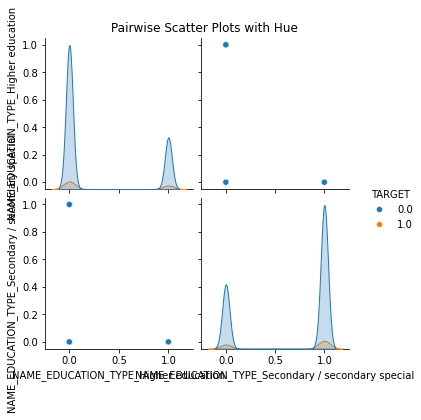

In [66]:
plot_pairwise_scatter_with_hue(df_proc, vars_to_plot=['NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special'])

<Figure size 1000x1000 with 0 Axes>

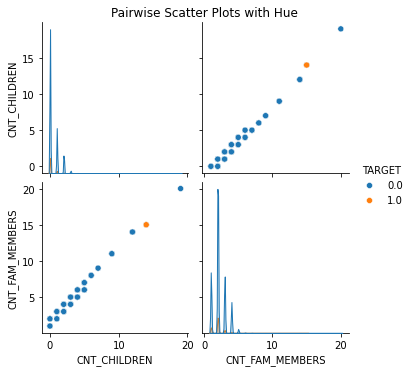

In [67]:
plot_pairwise_scatter_with_hue(df_proc, vars_to_plot=['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])

## Classification Modeling

In [69]:
print(df.shape)
print(df_proc.shape)
print(df_proc_modified.shape)

(338426, 17)
(338426, 52)
(338426, 52)


Ci serve un classificatore in grado di fornire anche una spiegazioni. 

Ragioniamo sulle possibili optioni:
- Regressione Logistica -> LogisticRegression
- Regressione Logistica con GD -> SGDClassifier
- Naive Bayes -> BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
- Maximal Margin Classifier -> SVC, LinearSVC
- Support Vector Machine -> SVC (poly, sigmoid, rbf)
- Multilayer Perceptron -> MLPClassifier
- Nearest Neighbord -> KNeighborsClassifier, RadiusNeighborsClassifier
- Alberi Decisionali -> DecisionTreeClassifier,RandomForestClassifier

Vista la richiesta di implementare una classificazione spiegabile, opteremo per la famiglia degli **alberi decisionali**.

Non dimenticare il problema dello sbilanciamento delle classi: 
- stratified in train-test-split
- class_weight

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import export_graphviz,export_text
from IPython.display import Image, display
import graphviz

RANDOM_SEED = 1234

Definiamo le funzioni che ci servono per la valutazione del classificatore e la visualizzazione degli alberi

In [94]:
def classifier_report(model, data):
  X, y = data
  y_pred = model.predict(X)
  report = classification_report(y, y_pred)
  print(report)
  print(confusion_matrix(y, y_pred))

def tree_viz(tree, feature_names=None, class_names=None):
  dot_data = export_graphviz(tree, out_file=None,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)
  graph = graphviz.Source(dot_data, filename="tree", format="png")
  graph.view()
  display(Image("tree.png"))

Preparazione dei dati

In [95]:
X = df_proc.drop(columns="TARGET")
y = df_proc["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
print(X_train.shape, X_test.shape)  
print(y_train.shape, y_test.shape)


(270740, 51) (67686, 51)
(270740,) (67686,)


##### DecisionTree

Addestriamo l'albero

In [106]:
tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9493248234494578

In [107]:
classifier_report(tree, (X_train, y_train))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    246962
         1.0       0.78      0.88      0.83     23778

    accuracy                           0.97    270740
   macro avg       0.88      0.93      0.90    270740
weighted avg       0.97      0.97      0.97    270740

[[241050   5912]
 [  2867  20911]]


In [108]:
classifier_report(tree, (X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     61742
         1.0       0.69      0.76      0.72      5944

    accuracy                           0.95     67686
   macro avg       0.84      0.86      0.85     67686
weighted avg       0.95      0.95      0.95     67686

[[59759  1983]
 [ 1447  4497]]


In [117]:
#tree_viz(tree,feature_names=X_train.columns.values)
print(export_text(tree, feature_names=X_train.columns.values, class_names=["0", "1"]))

|--- AMT_INCOME_TOTAL <= 164191.50
|   |--- class: 0
|--- AMT_INCOME_TOTAL >  164191.50
|   |--- DAYS_BIRTH <= -15622.50
|   |   |--- DAYS_EMPLOYED <= -1485.50
|   |   |   |--- OCCUPATION_TYPE_Waiters/barmen staff <= 0.50
|   |   |   |   |--- AMT_INCOME_TOTAL <= 206550.00
|   |   |   |   |   |--- FLAG_OWN_CAR <= 0.50
|   |   |   |   |   |   |--- NAME_FAMILY_STATUS_Widow <= 0.50
|   |   |   |   |   |   |   |--- DAYS_EMPLOYED <= -1698.50
|   |   |   |   |   |   |   |   |--- DAYS_BIRTH <= -15799.00
|   |   |   |   |   |   |   |   |   |--- DAYS_BIRTH <= -16224.00
|   |   |   |   |   |   |   |   |   |   |--- DAYS_BIRTH <= -16364.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 33
|   |   |   |   |   |   |   |   |   |   |--- DAYS_BIRTH >  -16364.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |--- DAYS_BIRTH >  -16224.00
|   |   |   |   |   |   |   |   |   |   |--- DAYS_BIRTH <= -16219.00
|   | 

Vediamo cosa cambia con il Pruning

In [130]:
tree = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5) # min_impurity_decrease=.05, ccp_alpha=0.1
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9613509440652425

In [131]:
classifier_report(tree, (X_train, y_train))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    246962
         1.0       0.70      1.00      0.82     23778

    accuracy                           0.96    270740
   macro avg       0.85      0.98      0.90    270740
weighted avg       0.97      0.96      0.96    270740

[[236728  10234]
 [    92  23686]]


In [132]:
classifier_report(tree, (X_test, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     61742
         1.0       0.70      0.99      0.82      5944

    accuracy                           0.96     67686
   macro avg       0.85      0.98      0.90     67686
weighted avg       0.97      0.96      0.96     67686

[[59156  2586]
 [   30  5914]]


In [124]:
#tree_viz(tree, feature_names=X_train.columns.values)

Con il pruning riusciamo ad avere un albero con delle performance molto buone

##### RandomForest

Addestriamo la foresta

In [104]:
for n_tree in [1, 2, 3, 5, 10, 20, 50, 100, 500, 1000]:
  print(f"Addestramento di una foresta con {n_tree} alberi...")
  forest = RandomForestClassifier(n_tree, random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5)
  forest.fit(X_train, y_train)
  print(f"Accuracy: Train={forest.score(X_train, y_train):.3f} Test={forest.score(X_test, y_test):.3f}")

Addestramento di una foresta con 1 alberi...
Accuracy: Train=0.925 Test=0.925
Addestramento di una foresta con 2 alberi...
Accuracy: Train=0.942 Test=0.940
Addestramento di una foresta con 3 alberi...
Accuracy: Train=0.937 Test=0.936
Addestramento di una foresta con 5 alberi...
Accuracy: Train=0.926 Test=0.925
Addestramento di una foresta con 10 alberi...
Accuracy: Train=0.940 Test=0.938
Addestramento di una foresta con 20 alberi...
Accuracy: Train=0.944 Test=0.941
Addestramento di una foresta con 50 alberi...
Accuracy: Train=0.947 Test=0.944
Addestramento di una foresta con 100 alberi...
Accuracy: Train=0.943 Test=0.940
Addestramento di una foresta con 500 alberi...
Accuracy: Train=0.954 Test=0.952
Addestramento di una foresta con 1000 alberi...
Accuracy: Train=0.954 Test=0.950


In [127]:
forest = RandomForestClassifier(1000, random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5)
forest.fit(X_train, y_train)
print(f"Accuracy: Train={forest.score(X_train, y_train):.3f} Test={forest.score(X_test, y_test):.3f}")

Accuracy: Train=0.954 Test=0.950


##### Modello migliore

Il modello migliore è il Decision Tree con il pruning:
- accuracy train: 0,96
- accuracy test: 0,96


In [133]:
tree = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5) # min_impurity_decrease=.05, ccp_alpha=0.1
tree.fit(X_train, y_train)
tree.score(X_test, y_test)
classifier_report(tree, (X_train, y_train))
classifier_report(tree, (X_test, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    246962
         1.0       0.70      1.00      0.82     23778

    accuracy                           0.96    270740
   macro avg       0.85      0.98      0.90    270740
weighted avg       0.97      0.96      0.96    270740

[[236728  10234]
 [    92  23686]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     61742
         1.0       0.70      0.99      0.82      5944

    accuracy                           0.96     67686
   macro avg       0.85      0.98      0.90     67686
weighted avg       0.97      0.96      0.96     67686

[[59156  2586]
 [   30  5914]]


Probabilmente è migliorabile perché ci son tanti falsi positivi. Dipende dall'utilizzo. In questo caso funziona bene con i negativi, ossia clienti a cui viene negata la carta di credito a causa di una bassa affidabilità creditizia.

Se si vuole prediligere il riconoscimento dei positivi, quindi aumentare la precisione della classe 1 e diminuire i falsi positivi, occorre modificare la soglia di attribuzione

In [160]:
y_proba_train = tree.predict_proba(X_train)
y_proba_test = tree.predict_proba(X_test)

y_pred_train = np.where(y_proba_train[:,1]>0.69, 1, 0)
y_pred_test = np.where(y_proba_test[:,1]>0.69, 1, 0) 

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))


TRAIN REPORT
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97    246962
         1.0       0.71      0.77      0.74     23778

    accuracy                           0.95    270740
   macro avg       0.84      0.87      0.86    270740
weighted avg       0.95      0.95      0.95    270740

TEST REPORT
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     61742
         1.0       0.70      0.76      0.73      5944

    accuracy                           0.95     67686
   macro avg       0.84      0.87      0.85     67686
weighted avg       0.95      0.95      0.95     67686



L'intervento non è riuscito. Il classificatore lavora bene con la classe negativa: è preciso e sensibile nell'individuare i soggetti a bassa affidabilità creditizia (con un bassissimo di falsi negativi).

##### Concludiamo con un piccolo test sul df modificato

In [163]:
X = df_proc_modified.drop(columns="TARGET")
y = df_proc_modified["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

tree_test = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5) # min_impurity_decrease=.05, ccp_alpha=0.1
tree_test.fit(X_train, y_train)
tree_test.score(X_test, y_test)
classifier_report(tree_test, (X_train, y_train))
classifier_report(tree_test, (X_test, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    246962
         1.0       0.70      1.00      0.82     23778

    accuracy                           0.96    270740
   macro avg       0.85      0.98      0.90    270740
weighted avg       0.97      0.96      0.96    270740

[[236728  10234]
 [    92  23686]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     61742
         1.0       0.70      0.99      0.82      5944

    accuracy                           0.96     67686
   macro avg       0.85      0.98      0.90     67686
weighted avg       0.97      0.96      0.96     67686

[[59156  2586]
 [   30  5914]]


I risultati sono uguali. Non cambia nulla. Il classificatore è robusto rispetto all'errore riscontrato in DAYS_EMPLOYED

## Algoritmo spiegabile?

In [192]:
x_test = df_proc.iloc[1,:]
x_test = x_test.drop("TARGET")
x_test = x_test.values.reshape(1,-1)
x_test.shape

(1, 51)

In [194]:
y_test = tree.predict_proba(x_test)
y_test

c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [198]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Percorso per l'osservazione:
Nodo 0: (X[44] <= 164191.5)
Nodo 2: (X[45] <= -15622.5)
Nodo 3: (X[46] <= -1485.5)
Nodo 109 (foglia)


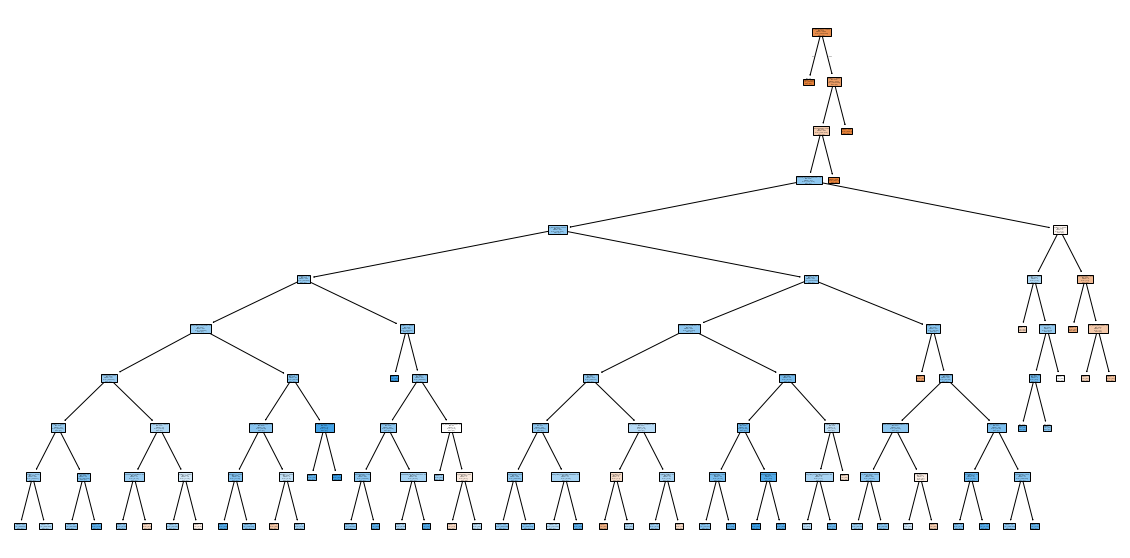

In [201]:
observation = X_test.iloc[1].values.reshape(1, -1)

# Ottieni il percorso dell'osservazione
node_indicator = tree.decision_path(observation)
leave_id = tree.apply(observation)

# Visualizza l'albero decisionale
plt.figure(figsize=(20, 10))
plt.title("Decision Tree")
plot_tree(tree, feature_names=X_train.columns, class_names=True, filled=True)

# Evidenzia il percorso dell'osservazione
n_nodes = tree.tree_.node_count
feature = tree.tree_.feature
threshold = tree.tree_.threshold

# Ottieni gli indici dei nodi nel percorso
node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

print('Percorso per l\'osservazione:')
for node_id in node_index:
    if leave_id[0] == node_id:
        print(f'Nodo {node_id} (foglia)')
    else:
        print(f'Nodo {node_id}: (X[{feature[node_id]}] <= {threshold[node_id]})')

plt.show()

## Impacchettamento finale

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import export_graphviz,export_text
from IPython.display import Image, display
import graphviz


RANDOM_SEED = 1234

Carico i dati e li divido in train-test

In [242]:
URL = "credit_scoring.csv"
df = pd.read_csv(URL)

X = df.drop(columns="TARGET")
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
print(X_train.shape, X_test.shape)  
print(y_train.shape, y_test.shape)

(270741, 18) (67686, 18)
(270741,) (67686,)


Funzione che effettua il preprocessing sui dataset

In [243]:
def df_preprocessing(X,y,encoder=None,verbose=True):

    df_proc = pd.concat([X, y], axis=1)
    duplicates = df_proc.duplicated()

    df_proc.dropna(subset=["NAME_FAMILY_STATUS"], inplace=True)
    df_proc.drop(columns=["ID","FLAG_MOBIL"], inplace=True)
    df_proc["OCCUPATION_TYPE"] = df_proc["OCCUPATION_TYPE"].fillna("unknown_occupation") 

    cat_features = [col for col in df_proc.columns if df_proc[col].dtypes == 'object']

    if encoder is None:
        encoder = ColumnTransformer([('LE', OrdinalEncoder(), cat_features[:3]),
                                    ('OHE', OneHotEncoder(), cat_features[3:])], remainder="passthrough")
        df_transformed = encoder.fit_transform(df_proc)
        print("fit_transform in progress...")

    else:
        df_transformed = encoder.transform(df_proc)
        print("transform in progress...")
        
    # Get feature names for OneHotEncoder
    columns = df_proc.columns.tolist()
    ohe_feature_names = encoder.named_transformers_['OHE'].get_feature_names_out(cat_features[3:])
    remaining_columns = [col for col in columns if col not in cat_features]

    # Combine feature names
    all_feature_names = [
        *cat_features[:3], 
        *ohe_feature_names, 
        *remaining_columns
    ]

    df_proc = pd.DataFrame(df_transformed, columns=all_feature_names)

    if verbose:
        print("Il dataset contiene", duplicates.sum(), "duplicati")
        for col in df_proc.columns:
            if df_proc[col].isna().sum() > 0:
                print(f"La feature '{col}' ha {df_proc[col].isna().sum()} valori mancanti")
        print("La trasformazione ha generato un dataset con", df_proc.shape[1], "features rispetto alle", df.shape[1], "originali")
    
    X_proc = df_proc.drop(columns="TARGET")
    y_proc = df_proc["TARGET"]

    return X_proc,y_proc, encoder


In [244]:
X_train, y_train, encoder = df_preprocessing(X_train, y_train, verbose=True)
X_test, y_test, _ = df_preprocessing(X_test, y_test, encoder, verbose=True)


fit_transform in progress...
Il dataset contiene 0 duplicati
La trasformazione ha generato un dataset con 52 features rispetto alle 19 originali
transform in progress...
Il dataset contiene 0 duplicati
La trasformazione ha generato un dataset con 52 features rispetto alle 19 originali


Funzioni per la valutazione del classificatore

In [245]:
def classifier_report(model, data):
  X, y = data
  y_pred = model.predict(X)
  report = classification_report(y, y_pred)
  print(report)
  print(confusion_matrix(y, y_pred))

def tree_viz(tree, feature_names=None, class_names=None):
  dot_data = export_graphviz(tree, out_file=None,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)
  graph = graphviz.Source(dot_data, filename="tree", format="png")
  graph.view()
  display(Image("tree.png"))

Miglior classificatore e metriche

In [246]:
tree = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5) # min_impurity_decrease=.05, ccp_alpha=0.1
tree.fit(X_train, y_train)
tree.score(X_test, y_test)
classifier_report(tree, (X_train, y_train))
classifier_report(tree, (X_test, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    246962
         1.0       0.70      1.00      0.82     23778

    accuracy                           0.96    270740
   macro avg       0.85      0.98      0.90    270740
weighted avg       0.97      0.96      0.96    270740

[[236723  10239]
 [    92  23686]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     61742
         1.0       0.70      0.99      0.82      5944

    accuracy                           0.96     67686
   macro avg       0.85      0.98      0.90     67686
weighted avg       0.97      0.96      0.96     67686

[[59161  2581]
 [   30  5914]]


Per la valutazione della spiegabilità dell'algoritmo

c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Francesco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Percorso per l'osservazione:
Nodo 0: (X[44] <= 164191.5)
Nodo 2: (X[45] <= -15622.5)
Nodo 3: (X[46] <= -1485.5)
Nodo 109 (foglia)


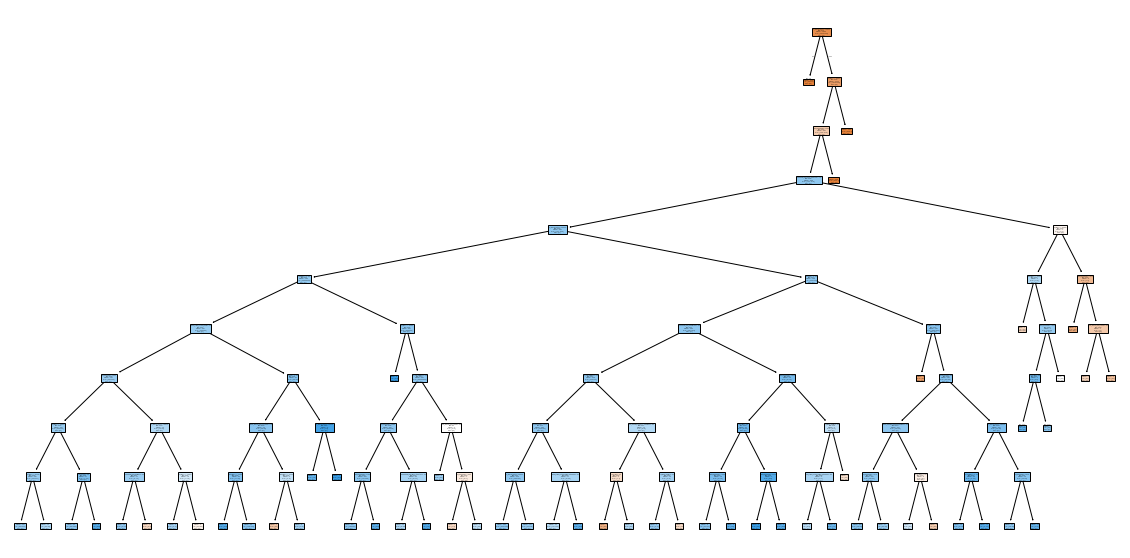

In [247]:
observation = X_test.iloc[1].values.reshape(1, -1)

# Ottieni il percorso dell'osservazione
node_indicator = tree.decision_path(observation)
leave_id = tree.apply(observation)

# Visualizza l'albero decisionale
plt.figure(figsize=(20, 10))
plt.title("Decision Tree")
plot_tree(tree, feature_names=X_train.columns, class_names=True, filled=True)

# Evidenzia il percorso dell'osservazione
n_nodes = tree.tree_.node_count
feature = tree.tree_.feature
threshold = tree.tree_.threshold

# Ottieni gli indici dei nodi nel percorso
node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

print('Percorso per l\'osservazione:')
for node_id in node_index:
    if leave_id[0] == node_id:
        print(f'Nodo {node_id} (foglia)')
    else:
        print(f'Nodo {node_id}: (X[{feature[node_id]}] <= {threshold[node_id]})')

plt.show()